In [1]:
import subprocess
import os
import pandas as pd
import numpy as np

from datetime import datetime


%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
# git_pull = subprocess.Popen( "/usr/bin/git pull" , 
#                      cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
#                      shell = True, 
#                      stdout = subprocess.PIPE, 
#                      stderr = subprocess.PIPE )
# (out, error) = git_pull.communicate()

In [3]:
data_path='/home/balaji/dsProject/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,183358,183407,183445,183572,183687,183908,184038,184224,184360,184473
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,290954,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266356,266392,266424,266445,266487,266542,266591,266654,266700,266772
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,45061,45061,45061,45326,45326,45326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101600,101901,101901,101901,102209,102209,102209,102209,102301,102301


In [5]:
time_idx = pd_raw.columns[4:]

In [6]:
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [8]:
pd_raw[pd_raw['Country/Region']== 'Germany'].iloc[:, 4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [9]:
country_list = ['US', 'Germany', 'India', 'Qatar', 'Austria']

In [10]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

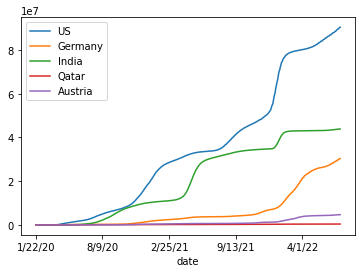

In [11]:
%matplotlib inline
df_plot.set_index('date').plot()

Data Type Date:


In [12]:
df_plot.head()

,date,US,Germany,India,Qatar,Austria
0,1/22/20,1,0,0,0,0
1,1/23/20,1,0,0,0,0
2,1/24/20,2,0,0,0,0
3,1/25/20,2,0,0,0,0
4,1/26/20,5,0,0,0,0


In [13]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [14]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Relational data model - defining a primary key


In [15]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [16]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/14/22,7/15/22,7/16/22,7/17/22,7/18/22,7/19/22,7/20/22,7/21/22,7/22/22,7/23/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,183358,183407,183445,183572,183687,183908,184038,184224,184360,184473
1,no,Albania,0,0,0,0,0,0,0,0,...,290954,293917,293917,293917,293917,293917,293917,293917,293917,293917
2,no,Algeria,0,0,0,0,0,0,0,0,...,266356,266392,266424,266445,266487,266542,266591,266654,266700,266772
3,no,Andorra,0,0,0,0,0,0,0,0,...,44671,44671,44671,44671,45061,45061,45061,45326,45326,45326
4,no,Angola,0,0,0,0,0,0,0,0,...,101600,101901,101901,101901,102209,102209,102209,102209,102301,102301


In [17]:
test_pd = pd_data_base.set_index(['state', 'country']).T

In [18]:
test_pd.columns

MultiIndex([(                          'no',          'Afghanistan'),
            (                          'no',              'Albania'),
            (                          'no',              'Algeria'),
            (                          'no',              'Andorra'),
            (                          'no',               'Angola'),
            (                          'no',           'Antarctica'),
            (                          'no',  'Antigua and Barbuda'),
            (                          'no',            'Argentina'),
            (                          'no',              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                          'no',              'Uruguay'),
            (                          'no',           'Uzbekistan'),
            (                          'no',              'Vanuatu'),
            (                          'no',            'Venezuela'),
    

In [19]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
260485,7/23/22,no,West Bank and Gaza,672039.0
260486,7/23/22,no,Winter Olympics 2022,535.0
260487,7/23/22,no,Yemen,11849.0
260488,7/23/22,no,Zambia,328550.0


In [20]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()


,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [21]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [22]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [23]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [24]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('/home/balaji/dsProject/data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [25]:


print(pd_relational_model[pd_relational_model['country']=='US'].tail())



             date state country  confirmed
259335 2022-07-19    no      US   89830497
259620 2022-07-20    no      US   90046261
259905 2022-07-21    no      US   90200438
260190 2022-07-22    no      US   90367064
260475 2022-07-23    no      US   90390185
